%## Vibrational frequencies and normal modes
(sec:vib-analysis)=
# Vibrational analysis

The following steps are carried out mostly by the geomeTRIC module {cite}`Wang2016`,
hence they are described in less detail.
For more details on the topic, the reader is referred to _Molecular Vibrations_
by Wilson, Decius and Cross {cite}`Wilson1980`.


## Cartesian and mass-weighted Hessian

The starting point for the vibrational analysis of molecules
is the Hessian matrix in Cartesian coordinates, $\mathbf{H}^{\text{Cart}}$,
calculated either numerically or analytically as described in the [previous section](sec:mol-hessian).
Generally, the elements of $\mathbf{H}^{\text{Cart}}$ are given by second derivatives of the energy $E$
with respect to nuclear displacement

(eq:Hessian_matrix_elements)=
```{math}
%:label: eq:Hessian_matrix_elements
  H_{ij}^{\text{Cart}} = \bigg( \frac{\mathrm{d}^2 E}{\mathrm{d} x_i \mathrm{d} x_j} \bigg)_0 
```
Hence, $\mathbf{H}^{\text{Cart}}$ is a $3N \times 3N$ matrix (where $N$ is the number of atoms),
and $x_1, x_2, \ldots, x_{3N}$ denote displacements of the Cartesian coordiates. The '$0$' subscript indicates that the second deriatives are taken at the equilibrium geometry, where the first derivatives (or gradient) vanish.

As a first step, the Hessian is converted to _mass-weighted_ Cartesian coordinates (MWC),
$\bar{x}_1 = \sqrt{m_1} x_1$, $\bar{x}_2 = \sqrt{m_1} x_2 $, $\ldots$, $\bar{x}_{3N} = \sqrt{m_N} x_{3N}$, where $m_i$ is the mass of atom $i$, such that $\mathbf{H}^{\text{MWC}}$ is given by
(eq:Hessian_mwc)=
```{math}
%:label: eq:Hessian_mwc
  H_{ij}^{\text{MWC}} = \frac{H_{ij}^{\text{Cart}}}{\sqrt{m_i m_j}} = \bigg( \frac{\mathrm{d}^2 E}{\mathrm{d} \bar{x}_i \mathrm{d} \bar{x}_j} \bigg)_0 
```
Diagonalizing this Hessian gives $3N$ eigenvalues which represent the fundamental frequencies of the molecule,
but include translation and rotational modes.


## Translating and rotating frame

In order to remove translational and rotational degrees of freedom,
one first determines the center of mass (COM) $\mathbf{R}^{\text{COM}}$ in the usual way
```{math}
%:label: eq:center_of_mass
  \mathbf{R}^{\text{COM}} = \frac{\sum_{K} m_{K} \mathbf{R}_K}{\sum_{K} \mathbf{R}_K} 
```
where the sum runs over all atoms $K$, and the origin is then shifted to the COM, $\mathbf{R}_{K}^{\text{COM}} = \mathbf{R}_K - \mathbf{R}^{\text{COM}}$. Subsequently, one determines the inertia tensor and diagonalizes it
to obtain principal moments and axes of inertia. Next, one needs to find the transformation from mass-weighted Cartesian coordinates to a set of $3N$ coordinates, where the molecule's translation and rotation are separated out,
leaving $3N - 6$ (or $3N-5$ for linear molecules) vibrational modes.

This is achieved by applying the so-called Eckart conditions {cite}`Eckart1934`. While the three vectors of length $3N$ corresponding to translation are simply given by $\sqrt{m_i}$ times the coordinate axis, the vectors corresponding to rotational motion of the atoms are obtained from the coordinates of the atoms with respect to the COM and the corresponding row of the matrix used to diagonalize the moment of inertia tensor. In the next step, these vectors are normalized and a Gram--Schmidt orthogonalization is carried out to create $N_\text{vib} = 3N-6$ (or $3N-5$) remaining vectors, which are orthogonal to the five or six translational and rotational vectors. Thus, one obtains a transformation matrix $\mathbf{B}$ which allows for the transformation of the mass-weighted Cartesian coordinates $\mathbf{\bar{x}}$ to internal coordinates $\mathbf{\bar{q}} = \mathbf{B\bar{x}}$, where translation and rotation have been projected out.
%Thus, one obtains a basis in which translation and rotation
%is projected out of the (mass-weighted) Cartesian coordinates.


## Hessian in internal coordinates and harmonic frequencies

Now the Hessian $\mathbf{H}^\text{MWC}$, which is still given in mass-weighted Cartesian coordinates,
is transformed the the internal coordinate system,
(eq:Hessian_to_internal)=
```{math}
%:label: eq:Hessian_to_internal
  \mathbf{H}^{\text{Int}} = \mathbf{B}^\dagger \mathbf{H}^\text{MWC} \mathbf{B} \, ,
```
yielding a representation in $N_\text{vib}$ internal coordinates from the full $3N$ Cartesian coordinates.
The Hessian in internal coordinates $\mathbf{H}^{\text{Int}}$ is successively diagonalized,
(eq:Hessian_internal_diagonalized)=
```{math}
%:label: eq:Hessian_internal_diagonalized
  \mathbf{L}^\dagger \mathbf{H}^{\text{Int}} \mathbf{L} = \mathbf{\Lambda} \, ,
```
where $\mathbf{\Lambda}$ is the diagonal matrix of $N_{\text{vib}}$ eigenvalues $\lambda_i$
which are related to the harmonic vibrational frequencies $\nu_i$ and $\mathbf{L}$ is the transformation matrix composed of the eigenvectors.

Finally, the eigenvalues $\lambda_i = 4 \pi^2 \nu_i^2$ can be converted from frequencies $\nu_i$ to wavenumbers $\tilde{\nu}_i$ in reciprocal centimeters by using the relationship $\nu_i = c \tilde{\nu}_i$, where $c$ is the speed of light.The wavenumbers are thus obtained from
```{math}
%:label: eq:vibrations_wavenumbers
  \tilde{\nu}_i = \sqrt{\frac{\lambda_i}{4\pi^2 c^2}} 
```
and successively appropriate conversion factors are applied to obtain the wavenumbers in inverse centimeters (cm$^{-\text{1}}$).


(sec:cartesian_displacements_red_mass)=
## Cartesian displacements, reduced masses, and force constants

The Cartesian normal modes $\mathbf{l}^{\text{Cart}}$ are obtained by combining [this](eq:Hessian_to_internal)
and [this](eq:Hessian_internal_diagonalized) equation together with a diagonal matrix $\mathbf{M}$
defined by $M_{ii} = \frac{1}{\sqrt{m_i}}$ to undo the mass-weighting,
$\mathbf{l}^{\text{Cart}} = \mathbf{M D L}$, with the individual elements of this matrix being given by
```{math}
  l_{ij}^{\text{Cart}} = \sum_{k=1}^{3N} \frac{B_{ik} L_{kj}}{\sqrt{m_i}} \, .
```
The (normalized) column vectors of $\mathbf{l}^{\text{Cart}}$ correspond to the normal-mode displacements in Cartesian coordinates, which are used together with property gradients for the calculation of spectral intensities as described [here](sec:property-gradients).

From the Cartesian normal modes $\mathbf{l}^{\text{Cart}}$, the reduced mass $\mu_i$ of vibration $i$
can be calculated as
```{math}
%:label: eq:reduced_masses
  \mu_i = \frac{1}{\sum_{k=1}^{3N} \big( l_{ki}^{\text{Cart}} \big)^2} \, ,
```
Using the reduced masses, the corresponding force constants $k_i$ are calculated as
```{math}
%:label: eq:force_constants
  k_i = 4 \pi^2 \tilde{\nu}_i^2 \mu_i \, ,
```
since $\tilde{\nu}_i = \frac{1}{2 \pi} \sqrt{\frac{k_i}{\mu_i}}$.
%The force constants are then converted from atomic units to milli-dyne per ångström.

The spectral intensities are calculated from the [dipole moment gradient](dipole_mom_gradient:label) (IR spectroscopy), or the [polarizability gradient](polarizability_gradient:label) (Raman spectroscopy).

## Practical example

We can perform a vibrational analysis using the `VibrationalAnalysis` class of VeloxChem. Let us create a molecule, optimize the geometry, and run the vibrational analysis on the optimized geometry.

In [26]:
import veloxchem as vlx

In [2]:
molecule = vlx.Molecule.read_smiles("C=C")
basis = vlx.MolecularBasis.read(molecule, "def2-svp")

scf_drv = vlx.ScfRestrictedDriver()
scf_drv.xcfun = "b3lyp"
scf_results = scf_drv.compute(molecule, basis)

In [6]:
opt_drv = vlx.OptimizationDriver(scf_drv)
opt_results = opt_drv.compute(molecule, basis, scf_results)

In [20]:
opt_molecule = vlx.Molecule.read_xyz_string(opt_results['final_geometry'])
opt_molecule.show()

In [22]:
vib_analysis = vlx.VibrationalAnalysis(scf_drv)
vib_analysis_results = vib_analysis.compute(opt_molecule, basis)

Once the vibrational analysis has been performed, we can animate the vibrational normal modes, or plot the IR spectrum.

In [24]:
vib_analysis.animate(vib_analysis_results, mode=1)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

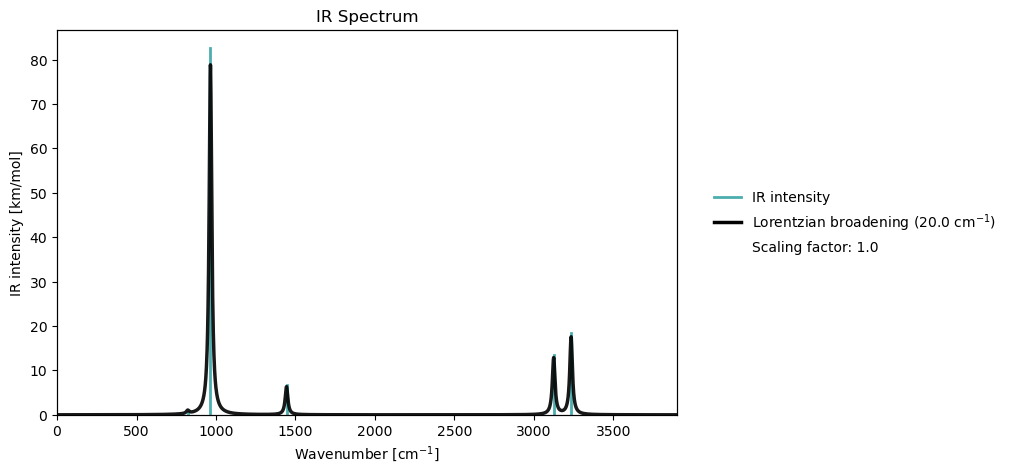

In [25]:
vib_analysis.plot(vib_results=vib_analysis_results)